In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
#os.chdir("data/shots")

In [57]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

['shot log PHX.csv', 'shot log MIL.csv', 'shot log SAC.csv', 'shot log DAL.csv', 'shot log MIN.csv', 'shot log MEM.csv', 'shot log WAS.csv', 'shot log SAS.csv', 'shot log PHI.csv', 'shot log BOS.csv', 'combined_csv.csv', 'shot log CHA.csv', 'shot log LAC.csv', 'shot log UTA.csv', 'shot log DET.csv', 'shot log ATL.csv', 'shot log BRO.csv', 'shot log TOR.csv', 'shot log CLE.csv', 'shot log DEN.csv', 'shot log IND.csv', 'shot log POR.csv', 'shot log ORL.csv', 'shot log NYK.csv', 'shot log GSW.csv', 'shot log NOP.csv', 'shot log LAL.csv', 'shot log OKL.csv', 'shot log HOU.csv', 'shot log CHI.csv', 'shot log MIA.csv']


#### this cell is to be executed only once. Number of rows has to be 210072. 

In [58]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [59]:
df = pd.DataFrame(combined_csv)

In [60]:
df.shape

(210072, 16)

In [61]:
df.head()

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,PF,Yes,107.0,SCORED,PHX,Floating Jump Shot,2,SAC,252.0,0:51,2016-10-26,Jared Dudley,NaN,1,SCORED
1,SCORED,SG,Yes,254.0,MISSED,PHX,Jump Shot,3,SAC,56.0,1:14,2016-10-26,Devin Booker,23.0,1,MISSED
2,MISSED,C,Yes,52.0,SCORED,PHX,Cutting Dunk Shot,2,SAC,250.0,1:44,2016-10-26,Tyson Chandler,30.0,1,SCORED
3,SCORED,PG,Yes,241.0,MISSED,PHX,Pullup Jump Shot,2,SAC,359.0,2:16,2016-10-26,Eric Bledsoe,32.0,1,MISSED
4,MISSED,SG,Yes,225.0,MISSED,PHX,Jump Shot,3,SAC,447.0,2:40,2016-10-26,Devin Booker,24.0,1,MISSED


In [62]:
df = df.drop(['self previous shot', 'opponent previous shot', 'time from last shot'], axis = 1)

In [70]:
df = df.rename(columns={'player position':'player_position','shot type':'shot_type','away team': 'away_team','current shot outcome':'outcome', 'home team' : 'home_team', 'location x':'loc_x','location y':'loc_y','shoot player':'shooter','home game':'home'})

In [71]:
df.head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome
0,PF,Yes,107.0,PHX,Floating Jump Shot,2,SAC,252.0,0:51,2016-10-26,Jared Dudley,1,SCORED
1,SG,Yes,254.0,PHX,Jump Shot,3,SAC,56.0,1:14,2016-10-26,Devin Booker,1,MISSED
2,C,Yes,52.0,PHX,Cutting Dunk Shot,2,SAC,250.0,1:44,2016-10-26,Tyson Chandler,1,SCORED
3,PG,Yes,241.0,PHX,Pullup Jump Shot,2,SAC,359.0,2:16,2016-10-26,Eric Bledsoe,1,MISSED
4,SG,Yes,225.0,PHX,Jump Shot,3,SAC,447.0,2:40,2016-10-26,Devin Booker,1,MISSED


#### check whether there are missing values in some of the columns

In [65]:
df.isnull().sum()

player position      0
home                 0
loc_x              397
home_team            0
shot type            0
points               0
away team            0
loc_y              397
time                 0
date                 0
shooter              0
quarter              0
outcome              0
dtype: int64

#### we have 397 missing coordinates. we can either delete them or replace with the mean coordinates of a particular player. since we do not build a prediction model, I think deletion is more sufficient

In [72]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df).head()

,player_position,home,loc_x,home_team,shot_type,points,away_team,loc_y,time,date,shooter,quarter,outcome
6061,PF,Yes,NaN,PHX,Jump Shot,3,ORL,NaN,7:00,2017-03-17,Jared Dudley,4,MISSED
6784,F,Yes,NaN,PHX,Alley Oop Dunk,2,HOU,NaN,0:24,2017-04-02,"Derrick Jones, Jr.",1,SCORED
6785,SG,Yes,NaN,PHX,Jump Shot,3,HOU,NaN,0:47,2017-04-02,Devin Booker,1,MISSED
6786,SG,Yes,NaN,PHX,Jump Shot,2,HOU,NaN,1:16,2017-04-02,Devin Booker,1,MISSED
6787,F,Yes,NaN,PHX,Jump Shot,3,HOU,NaN,1:35,2017-04-02,Marquese Chriss,1,MISSED


In [73]:
df['outcome'] = df.outcome.replace('BLOCKED','MISSED')

In [68]:
# df = df[df.date == '2016-10-25']

In [75]:
df = df[df['home'] == 'Yes']

In [76]:
df1 = df[df.quarter == 1 ]
df2 = df[df.quarter == 2]
df3 = df[df.quarter == 3]
df4 = df[df.quarter == 4]

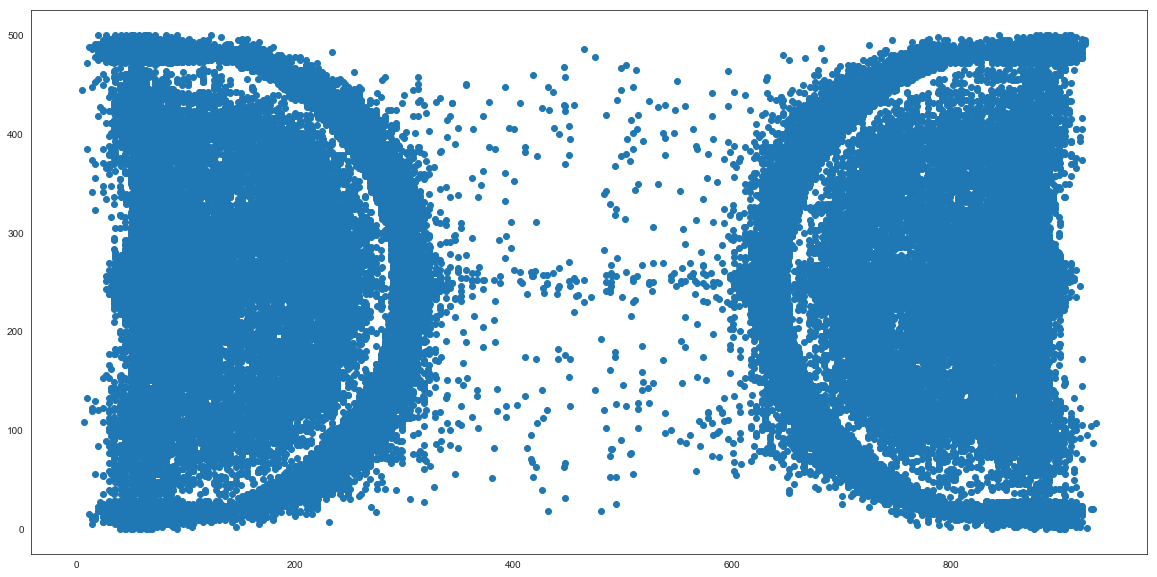

In [77]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(20,10))
plt.scatter(df['loc_x'], df['loc_y'])
plt.show()

In [79]:
df.loc_x.max(), df.loc_y.max()

(933.0, 500.0)

In [ ]:
df.loc_x.min(), df.loc_y.min()

In [ ]:
width = df.loc_x.max() -  df.loc_x.min()
height = df.loc_y.max() - df.loc_y.min()
width, height, width/2

In [ ]:
df.loc_x.mode(), df.loc_y.mode()

In [ ]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    backboard1 = Rectangle((50, 225), -1, 50, linewidth=lw, color=color)
    backboard2 = Rectangle((895, 225), 1, 50, linewidth=lw, color=color)
    
    hoop1 = Circle((60, 250), radius=6, linewidth=lw, color=color, fill=False)
    hoop2 = Circle((885, 250), radius=6, linewidth=lw, color=color, fill=False)
    
    restricted1 = Arc((50, 250), 80, 80, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    restricted2 = Arc((895, 250), 80, 80, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_outer = Arc((195, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow2_outer = Arc((755, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_inner = Arc((195, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color, linestyle='dashed')
    
    freethrow2_inner = Arc((755, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color, linestyle='dashed')
    
    threepoint1 = Arc((90, 250), 450, 400, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    threepoint2 = Arc((850, 250), 450, 400, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)    
    
    innerbox1 = Rectangle((20, 200), 175, 100, linewidth=lw, color=color,
                          fill=False)
    
    innerbox2 = Rectangle((930, 200), -175, 100, linewidth=lw, color=color,
                          fill=False)
    
    outbox1 = Rectangle((20, 190), 175, 120, linewidth=lw, color=color,
                          fill=False)
    
    outbox2 = Rectangle((930, 190), -175, 120, linewidth=lw, color=color,
                          fill=False)
    
    half_court_line = Rectangle((470, 0), 1, 500, linewidth=lw, color=color,
                          fill=False)
    
    half_court_circle  = Circle((470, 250), radius=60, linewidth=lw, color=color, fill=False)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [backboard1, backboard2, hoop1, hoop2, restricted1,
                      restricted2, threepoint1, threepoint2, innerbox1,
                      innerbox2, freethrow1_outer, freethrow2_outer,
                      outbox1, outbox2, freethrow1_inner, freethrow2_inner,
                      half_court_line, half_court_circle]
    
    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((20, 0), 910, 500, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    
      # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_aspect('auto')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')
    
    return ax


In [ ]:
plt.figure(figsize=(16,10))
colors = np.where(df["outcome"]=='SCORED','g','r')
plt.scatter(df['loc_x'], df['loc_y'], c=colors, alp)
draw_court(outer_lines=True)
plt.show()

In [ ]:
# create our jointplot
joint_shot_chart = sns.jointplot(df.loc_x, df.loc_y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5, joint_kws={"color":colors})

joint_shot_chart.fig.set_size_inches(13,11)

ax = joint_shot_chart.ax_joint

draw_court(ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')